In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from scipy.sparse import hstack

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.sparse.linalg import svds

In [2]:
data = pd.read_csv('Coursera.csv')

In [4]:
df = data.copy()
df

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
...,...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"�Give me liberty, or give me death:� Rememberi...",retirement Causality career history of the ...
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


In [6]:
df.isnull().sum()

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

In [7]:
df['Difficulty Level'].value_counts()

Difficulty Level
Beginner          1444
Advanced          1005
Intermediate       837
Conversant         186
Not Calibrated      50
Name: count, dtype: int64

In [8]:
df['University'].value_counts()

University
Coursera Project Network                      562
University of Illinois at Urbana-Champaign    138
Johns Hopkins University                      110
University of Michigan                        101
University of Colorado Boulder                101
                                             ... 
GitLab                                          1
Yeshiva University                              1
University of Glasgow                           1
Laureate Education                              1
The World Bank Group                            1
Name: count, Length: 184, dtype: int64

In [9]:
df['University'].nunique()

184

In [10]:
df['Course Name'].nunique()

3416

### Data Visualization

#### Average ratings of each university

In [11]:
df['Course Rating'].dtype

dtype('O')

Convert Object type of Course Rating to numeric

In [12]:
df['Course Rating'] = pd.to_numeric(df['Course Rating'], errors='coerce')

In [13]:
df['Course Rating'].dtype

dtype('float64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Course Name         3522 non-null   object 
 1   University          3522 non-null   object 
 2   Difficulty Level    3522 non-null   object 
 3   Course Rating       3440 non-null   float64
 4   Course URL          3522 non-null   object 
 5   Course Description  3522 non-null   object 
 6   Skills              3522 non-null   object 
dtypes: float64(1), object(6)
memory usage: 192.7+ KB


In [15]:
df['Course Rating'].isnull().sum()

82

In [16]:
df = df.dropna(subset=['Course Rating'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3440 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Course Name         3440 non-null   object 
 1   University          3440 non-null   object 
 2   Difficulty Level    3440 non-null   object 
 3   Course Rating       3440 non-null   float64
 4   Course URL          3440 non-null   object 
 5   Course Description  3440 non-null   object 
 6   Skills              3440 non-null   object 
dtypes: float64(1), object(6)
memory usage: 215.0+ KB


In [18]:
df['University'].head(15)

0               Michigan State University
1                Coursera Project Network
2                     �cole Polytechnique
3                    IESE Business School
4                Coursera Project Network
5                Coursera Project Network
6     The Chinese University of Hong Kong
7                University of Washington
8        The State University of New York
10               Coursera Project Network
11       University of California, Irvine
12          University of Colorado System
13                        Rice University
14               Coursera Project Network
15                   University of Geneva
Name: University, dtype: object

Let's remove the punctuations from University names to make it short and precise

In [19]:
import re

df['University'] = df['University'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

df['University'].head(15)

C:\Users\hp\AppData\Local\Temp\ipykernel_11468\3973372351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['University'] = df['University'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


0               Michigan State University
1                Coursera Project Network
2                      cole Polytechnique
3                    IESE Business School
4                Coursera Project Network
5                Coursera Project Network
6     The Chinese University of Hong Kong
7                University of Washington
8        The State University of New York
10               Coursera Project Network
11        University of California Irvine
12          University of Colorado System
13                        Rice University
14               Coursera Project Network
15                   University of Geneva
Name: University, dtype: object

In [20]:
university_ratings = df.groupby('University')['Course Rating'].mean().reset_index()
university_ratings = university_ratings.sort_values(by='Course Rating', ascending=False)

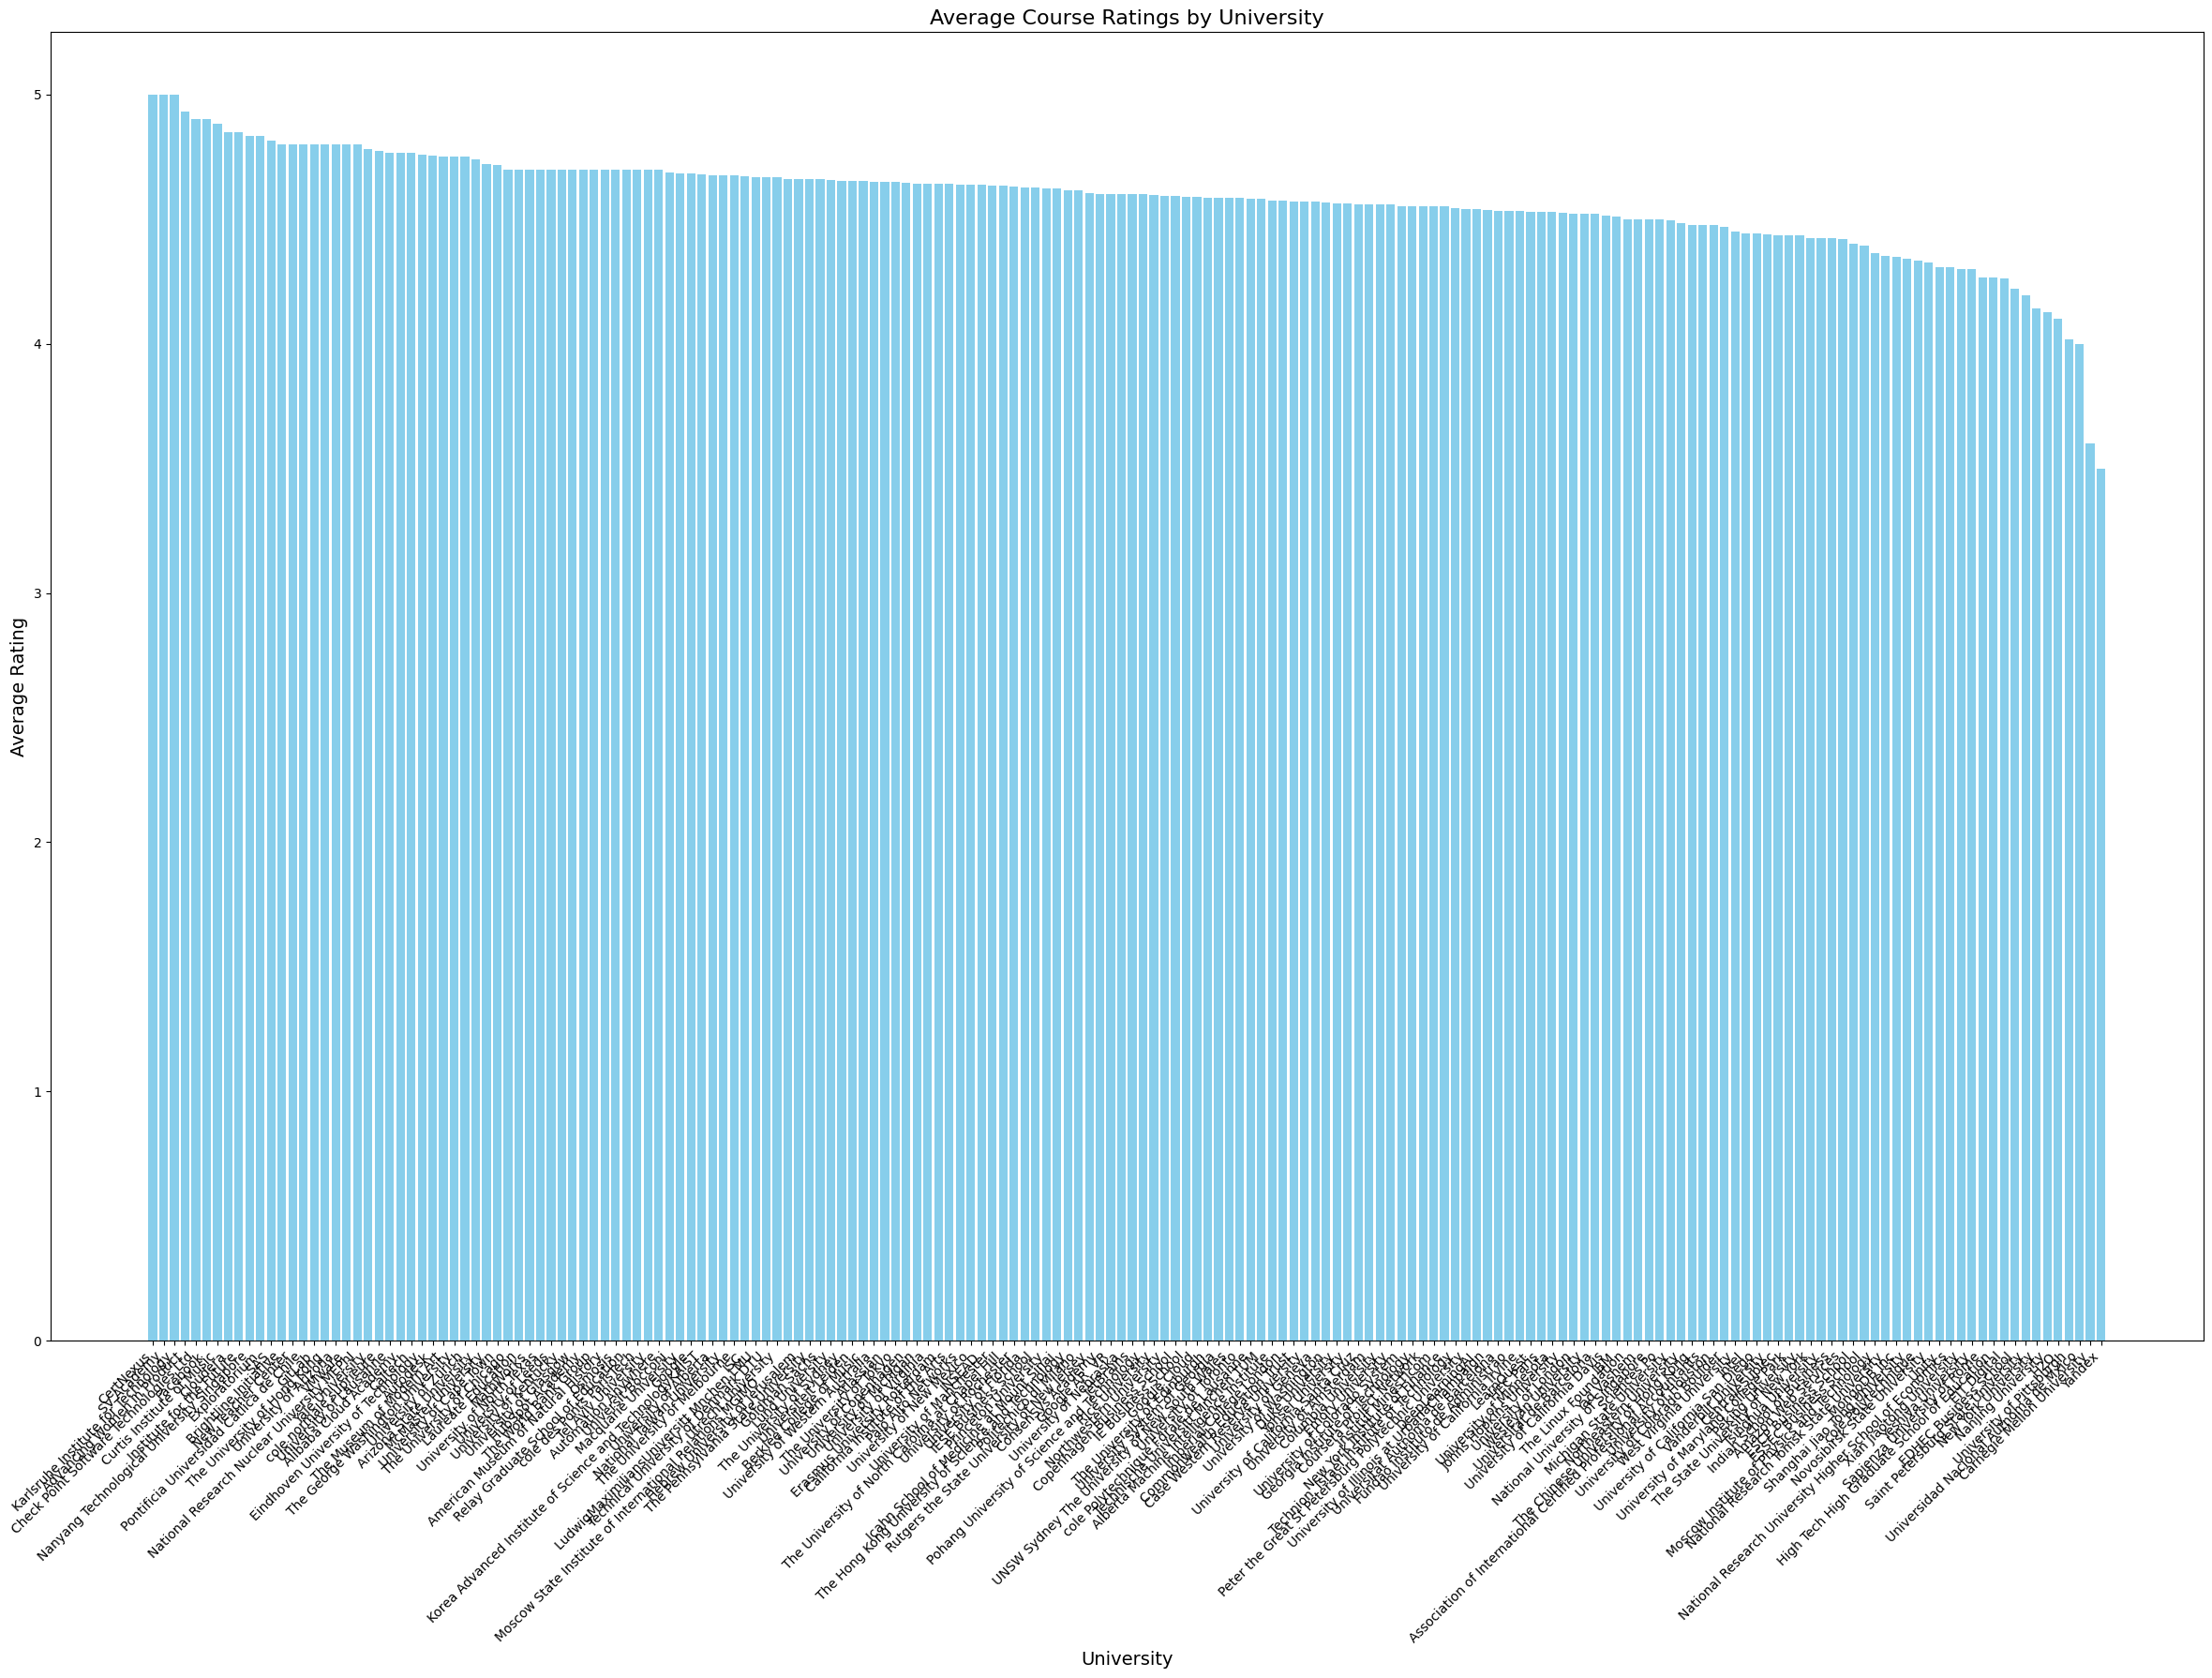

In [21]:
plt.figure(figsize=(24, 18))
plt.bar(university_ratings['University'], university_ratings['Course Rating'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Average Course Ratings by University', fontsize=16)
plt.xlabel('University', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.tight_layout()
plt.show()

#### Top rated courses in each Difficulty level

Grouped bar chart

In [22]:
df['Course Name'].head(15)

0     Write A Feature Length Screenplay For Film Or ...
1     Business Strategy: Business Model Canvas Analy...
2                         Silicon Thin Film Solar Cells
3                                  Finance for Managers
4          Retrieve Data using Single-Table SQL Queries
5     Building Test Automation Framework using Selen...
6                      Doing Business in China Capstone
7                         Programming Languages, Part A
8     The Roles and Responsibilities of Nonprofit Bo...
10         Agile Projects:  Developing Tasks with Taiga
11                  Esports Management Capstone Project
12                                 Hacking and Patching
13            Business Statistics and Analysis Capstone
14    Grab Data Fast with Vertical and Horizontal LO...
15         Global Health: An Interdisciplinary Overview
Name: Course Name, dtype: object

Let's remove the punctuations from University names to make it short and precise

In [23]:
import re

df['Course Name'] = df['Course Name'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

df['Course Name'].head(15)

C:\Users\hp\AppData\Local\Temp\ipykernel_11468\2322035327.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Course Name'] = df['Course Name'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


0     Write A Feature Length Screenplay For Film Or ...
1     Business Strategy Business Model Canvas Analys...
2                         Silicon Thin Film Solar Cells
3                                  Finance for Managers
4           Retrieve Data using SingleTable SQL Queries
5     Building Test Automation Framework using Selen...
6                      Doing Business in China Capstone
7                          Programming Languages Part A
8     The Roles and Responsibilities of Nonprofit Bo...
10          Agile Projects  Developing Tasks with Taiga
11                  Esports Management Capstone Project
12                                 Hacking and Patching
13            Business Statistics and Analysis Capstone
14    Grab Data Fast with Vertical and Horizontal LO...
15          Global Health An Interdisciplinary Overview
Name: Course Name, dtype: object

In [24]:
top_courses = df.sort_values(by='Course Rating', ascending=False).groupby('Difficulty Level').head(5)
top_courses

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
2435,Collaborate on Files in Slack Local Google Dr...,Coursera Project Network,Intermediate,5.0,https://www.coursera.org/learn/collaborate-fil...,"By the end of this project, you will maximize ...",organizational communication archive file Cl...
2617,Impute Data to Forecast Demand in Google Sheets,Coursera Project Network,Beginner,5.0,https://www.coursera.org/learn/impute-data-to-...,This course will introduce you to cleaning dat...,spreadsheet Spreadsheet Software linearity ...
3149,Simple Nearest Neighbors Regression and Classi...,Coursera Project Network,Beginner,5.0,https://www.coursera.org/learn/simple-nearest-...,"In this 2-hour long project-based course, we w...",principle Algorithms Regression supervision...
1893,Intermediate Intel Distribution of OpenVINO to...,Intel,Advanced,5.0,https://www.coursera.org/learn/int-openvino,This course is designed for application develo...,mobile application testing learning tools int...
964,Palliative Care Capstone Projects,University of Colorado System,Intermediate,5.0,https://www.coursera.org/learn/palliative-care...,In the Capstone Course you have the opportunit...,nonverbal communication health care self-awa...
69,Create an FPS Weapon in Unity Part 1 Revolver,Coursera Project Network,Advanced,5.0,https://www.coursera.org/learn/create-fps-weap...,"In this one-hour, project-based course, you'll...",gamification of learning project process .p...
1881,Artificial Intelligence Privacy and Convenience,LearnQuest,Advanced,5.0,https://www.coursera.org/learn/ai-privacy-and-...,"In this course, we will explore fundamental co...",ordered pair Machine Learning Big Data Game...
2891,Introduction to Unit Testing in Jest The Fund...,Coursera Project Network,Beginner,5.0,https://www.coursera.org/learn/unit-testing-in...,In this 1-hour long project-based course on In...,application programming interfaces Writing u...
1847,Exploring Beethovens Piano Sonatas Part 2,Curtis Institute of Music,Beginner,5.0,https://www.coursera.org/learn/exploring-beeth...,Welcome to Part 2 of Exploring Beethoven's Pia...,analysis latex piano happiness music prio...
560,Compare time series predictions of COVID19 deaths,Coursera Project Network,Beginner,5.0,https://www.coursera.org/learn/compare-time-se...,"In this 2-hour long project-based course, you ...",Python Programming modeling analysis projec...


In [25]:
import seaborn as sns

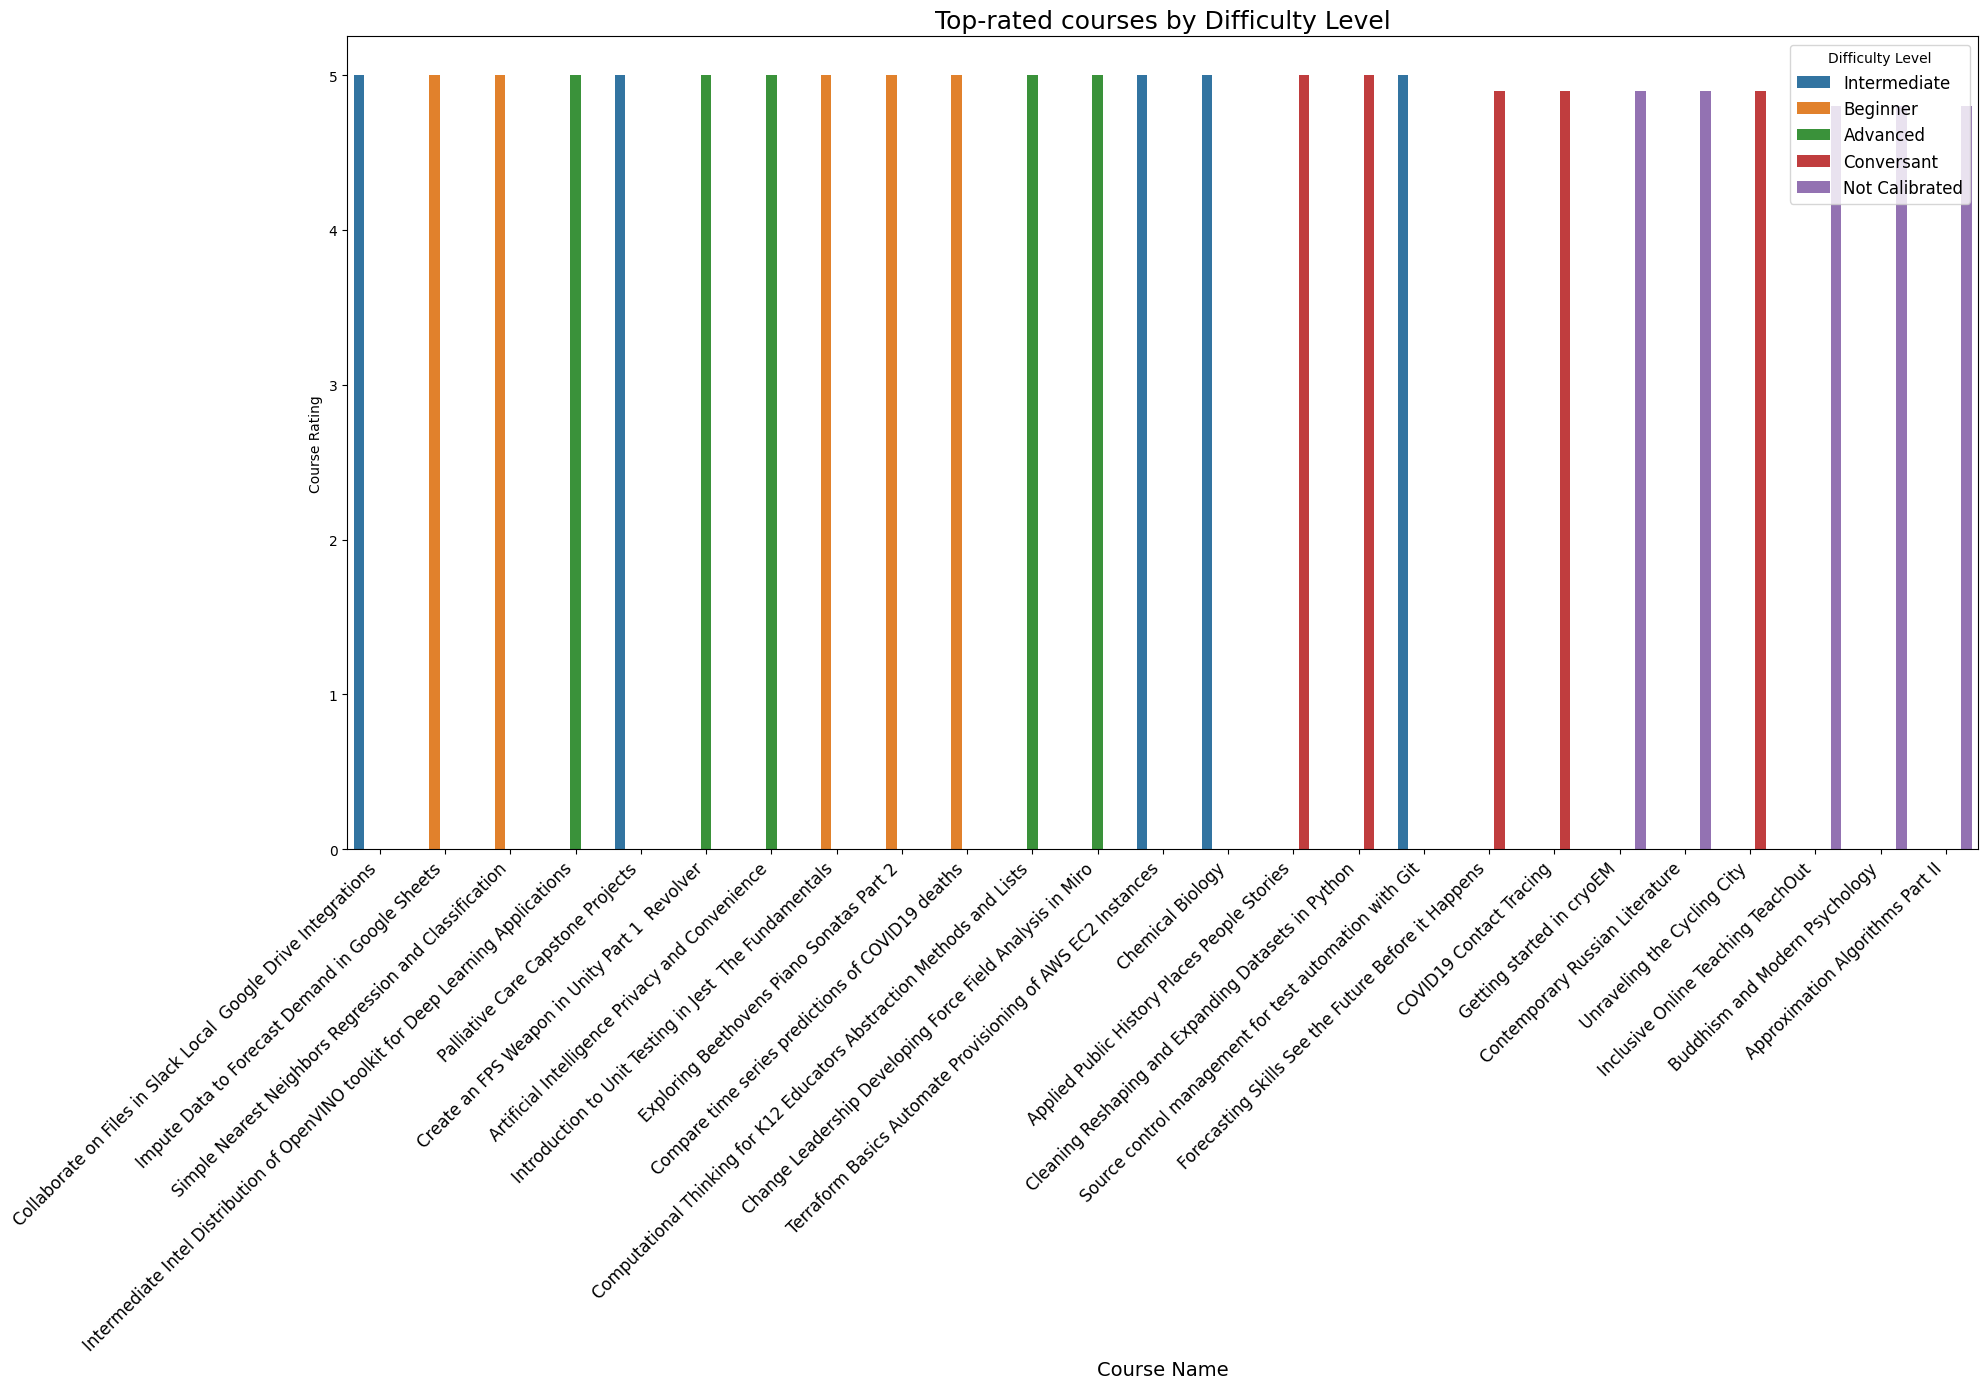

In [26]:
plt.figure(figsize=(20, 14))
sns.barplot(data=top_courses, x='Course Name', y='Course Rating', hue='Difficulty Level')
plt.title('Top-rated courses by Difficulty Level', fontsize=18)
plt.xlabel('Course Name', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Course Rating')
plt.legend(title='Difficulty Level', fontsize=12)
plt.tight_layout()
plt.show()

Taking a closer look to the above chart by scaling the y-axis

In [27]:
min(top_courses['Course Rating'])

4.8

In [28]:
max(top_courses['Course Rating'])

5.0

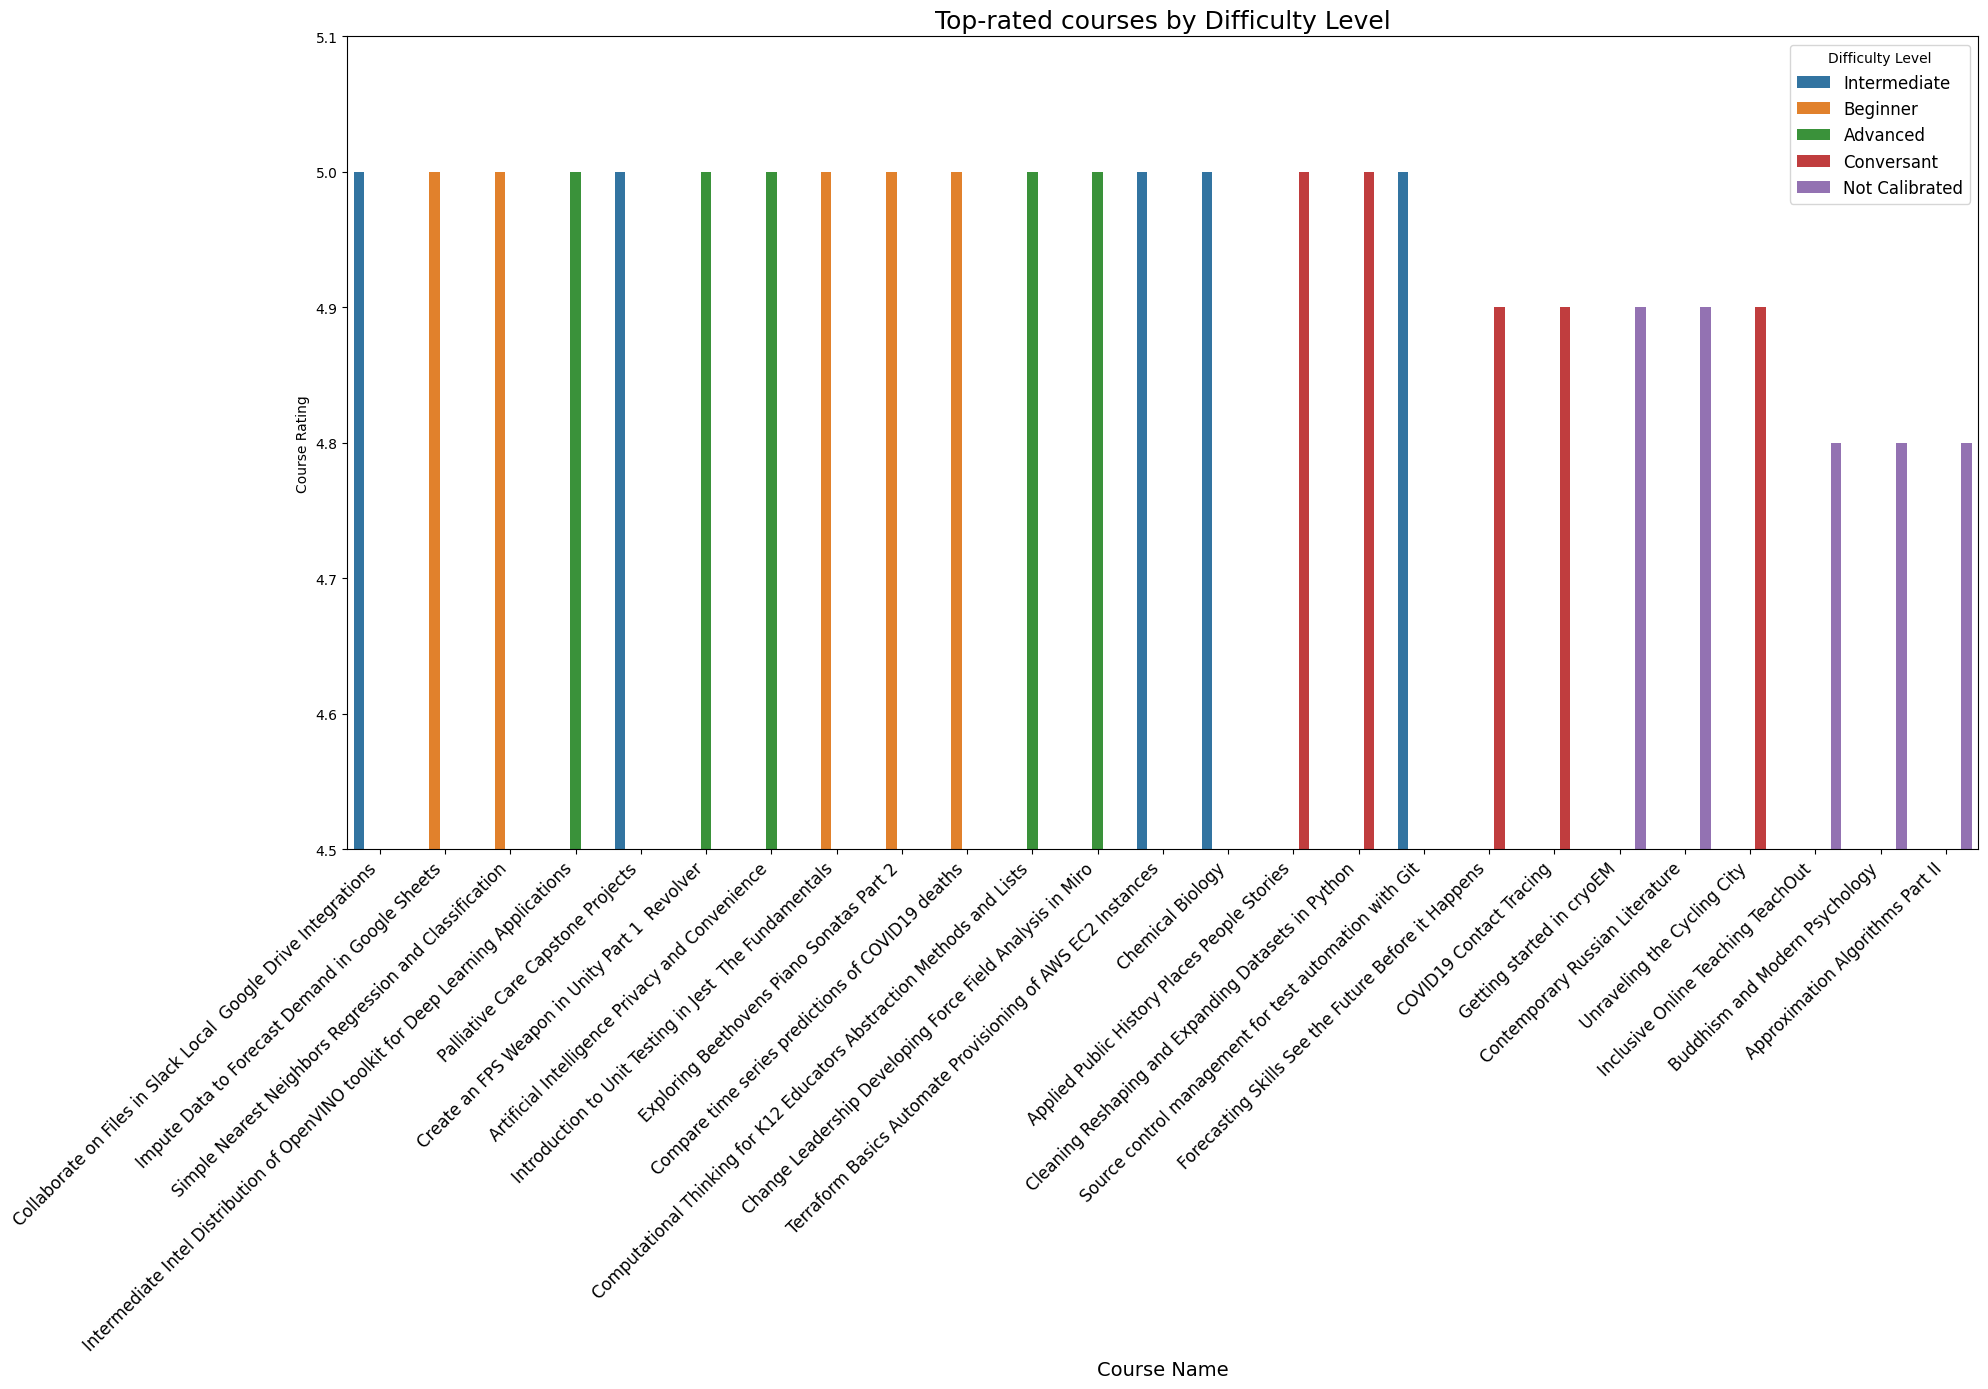

In [29]:
plt.figure(figsize=(20, 14))
sns.barplot(data=top_courses, x='Course Name', y='Course Rating', hue='Difficulty Level')
plt.ylim(min(top_courses['Course Rating']-0.3), max(top_courses['Course Rating']+0.1))

plt.title('Top-rated courses by Difficulty Level', fontsize=18)
plt.xlabel('Course Name', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Course Rating')
plt.legend(title='Difficulty Level', fontsize=12)
plt.tight_layout()
plt.show()

#### Course Ratings Distribution

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


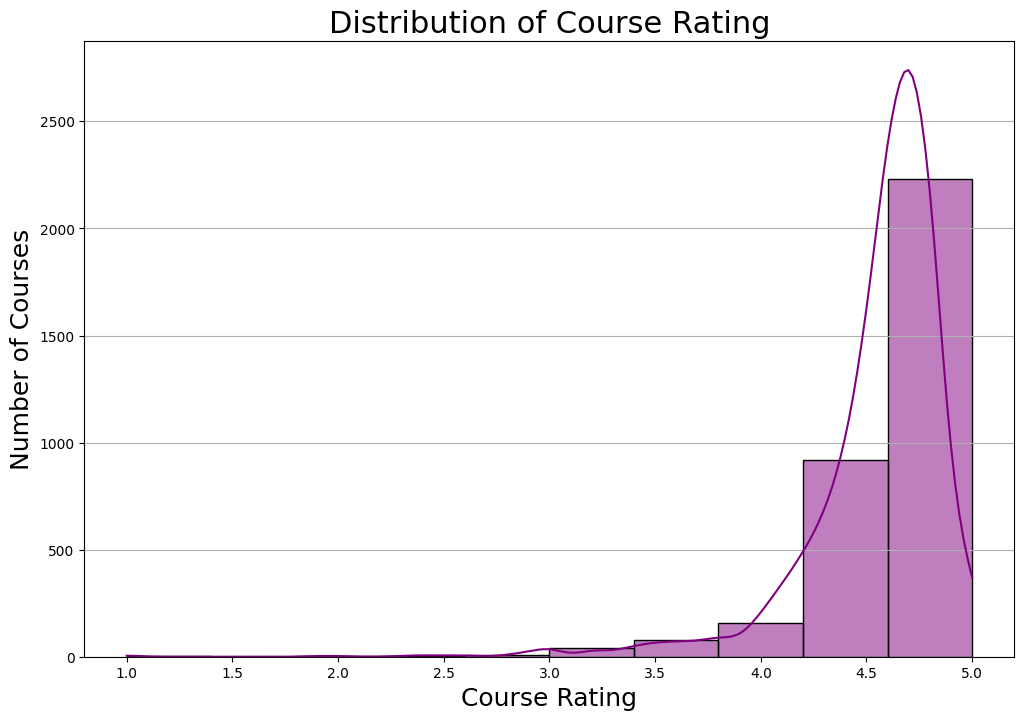

In [30]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Course Rating'], bins=10, color='purple', kde=True)
plt.title('Distribution of Course Rating', fontsize=22)
plt.xlabel('Course Rating', fontsize=18)
plt.ylabel('Number of Courses', fontsize=18)
plt.grid(axis='y')
plt.show()

#### Course Difficulty levels

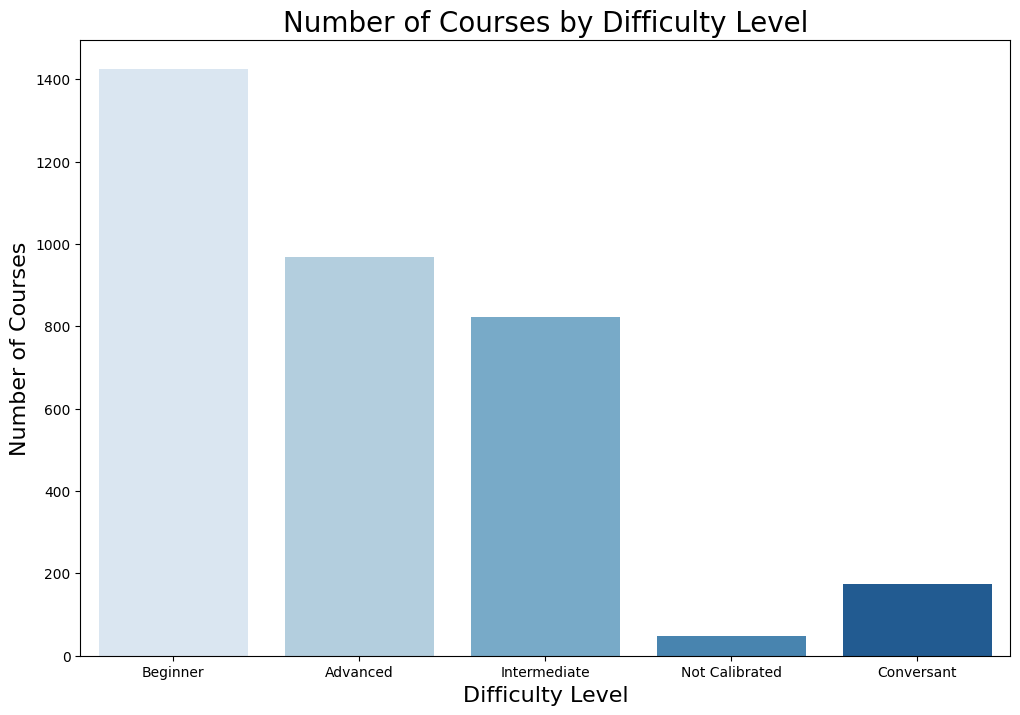

In [31]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Difficulty Level', palette='Blues')
plt.title('Number of Courses by Difficulty Level', fontsize=20)
plt.xlabel('Difficulty Level', fontsize=16)
plt.ylabel('Number of Courses', fontsize=16)
plt.show()

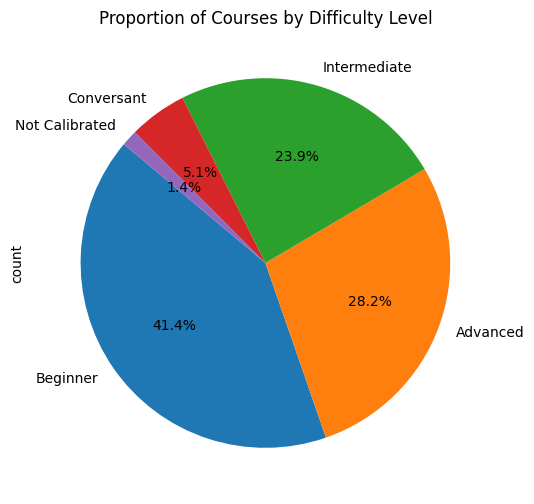

In [32]:
difficulty_counts = df['Difficulty Level'].value_counts()

plt.figure(figsize=(6, 6))
difficulty_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Courses by Difficulty Level')
plt.show()

#### Most Popular Skills

In [33]:
df['Skills'][0]

'Drama  Comedy  peering  screenwriting  film  Document Review  dialogue  creative writing  Writing  unix shells arts-and-humanities music-and-art'

In [34]:
skills_series = df['Skills'].dropna().str.split(' ').explode()
type(skills_series)

pandas.core.series.Series

In [35]:
stopwords = ['and', 'or', 'space', 'the', 'for', 'in', 'with', 'on', 'to', 'at', '']
filtered_skills = skills_series[~skills_series.isin(stopwords)]

filtered_skills_count = filtered_skills.value_counts().head(10)

In [36]:
filtered_skills_count

Skills
business            946
Management          781
Programming         660
Learning            606
analysis            584
computer-science    571
project             567
data-science        517
Data                497
management          455
Name: count, dtype: int64

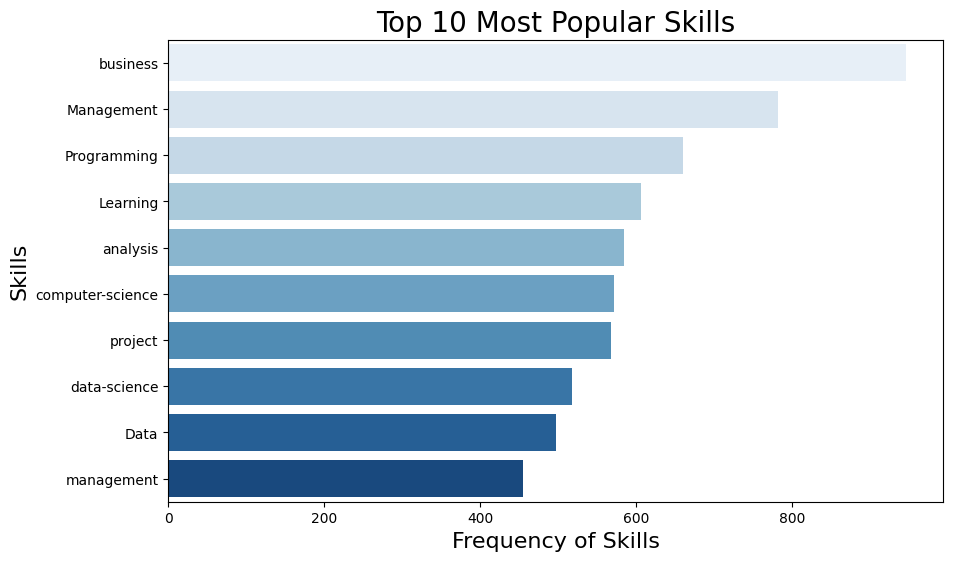

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_skills_count.values, y=filtered_skills_count.index, palette='Blues')
plt.title('Top 10 Most Popular Skills', fontsize=20)
plt.xlabel('Frequency of Skills', fontsize=16)
plt.ylabel('Skills', fontsize=16)
plt.show()

### Data Cleaning and Feature Engineering

#### Create a binary matrix for skills (One-Hot Encoding)

In [39]:
df['Skills'] = df['Skills'].apply(lambda skills: ' '.join([kw for kw in str(skills).split(' ') if not re.fullmatch(r'\d+', kw)]))
skills_flattened = df['Skills'].explode().dropna().unique()
skills_matrix = df['Skills'].apply(lambda x: [skill in x for skill in skills_flattened])
skills_flattened

C:\Users\hp\AppData\Local\Temp\ipykernel_11468\2801510090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Skills'] = df['Skills'].apply(lambda skills: ' '.join([kw for kw in str(skills).split(' ') if not re.fullmatch(r'\d+', kw)]))


array(['Drama  Comedy  peering  screenwriting  film  Document Review  dialogue  creative writing  Writing  unix shells arts-and-humanities music-and-art',
       'Finance  business plan  persona (user experience)  business model canvas  Planning  Business  project  Product Development  presentation  Strategy business business-strategy',
       'chemistry  physics  Solar Energy  film  lambda calculus  Electrical Engineering  electronics  energy  silicon  thinning physical-science-and-engineering electrical-engineering',
       ...,
       'analytics  tableau software  Business Intelligence  Statistical Dispersion  software  Demand Forecasting  General Statistics  Data Analysis  measurement  analysis business business-essentials',
       'Angular  Mechanical Design  fluid mechanics  Framing  3d rig  molecular dynamics  classical mechanics  energy  lecture  robotics physical-science-and-engineering mechanical-engineering',
       'bigtable  bigquery  SQL  Google Cloud Platform  role-based

#### Convert Difficulty Level to categorical for One-Hot Encoding

In [40]:
df['Difficulty Level'] = df['Difficulty Level'].astype('category')
df

C:\Users\hp\AppData\Local\Temp\ipykernel_11468\3978855291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Difficulty Level'] = df['Difficulty Level'].astype('category')


,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy Business Model Canvas Analys...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using SingleTable SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
...,...,...,...,...,...,...,...
3517,Capstone Retrieving Processing and Visualizing...,University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...
3518,Patrick Henry Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"�Give me liberty, or give me death:� Rememberi...",retirement Causality career history of the ...
3519,Business intelligence and data analytics Gener...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...


In [41]:
df = pd.get_dummies(df, columns=['Difficulty Level'], drop_first=True)
df

,Course Name,University,Course Rating,Course URL,Course Description,Skills,Difficulty Level_Beginner,Difficulty Level_Conversant,Difficulty Level_Intermediate,Difficulty Level_Not Calibrated
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,True,False,False,False
1,Business Strategy Business Model Canvas Analys...,Coursera Project Network,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,True,False,False,False
2,Silicon Thin Film Solar Cells,cole Polytechnique,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,False,False,False,False
3,Finance for Managers,IESE Business School,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,False,False,True,False
4,Retrieve Data using SingleTable SQL Queries,Coursera Project Network,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3517,Capstone Retrieving Processing and Visualizing...,University of Michigan,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...,True,False,False,False
3518,Patrick Henry Forgotten Founder,University of Virginia,4.9,https://www.coursera.org/learn/henry,"�Give me liberty, or give me death:� Rememberi...",retirement Causality career history of the ...,False,False,True,False
3519,Business intelligence and data analytics Gener...,Macquarie University,4.6,https://www.coursera.org/learn/business-intell...,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...,False,False,False,False
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...,True,False,False,False


In [42]:
df['Course Description'] = df['Course Description'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df['Skills'] = df['Skills'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


In [43]:
df.head()

,Course Name,University,Course Rating,Course URL,Course Description,Skills,Difficulty Level_Beginner,Difficulty Level_Conversant,Difficulty Level_Intermediate,Difficulty Level_Not Calibrated
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,True,False,False,False
1,Business Strategy Business Model Canvas Analys...,Coursera Project Network,4.8,https://www.coursera.org/learn/canvas-analysis...,By the end of this guided project you will be ...,Finance business plan persona user experienc...,True,False,False,False
2,Silicon Thin Film Solar Cells,cole Polytechnique,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,False,False,False,False
3,Finance for Managers,IESE Business School,4.8,https://www.coursera.org/learn/operational-fin...,When it comes to numbers there is always more ...,accounts receivable dupont analysis analysis...,False,False,True,False
4,Retrieve Data using SingleTable SQL Queries,Coursera Project Network,4.6,https://www.coursera.org/learn/single-table-sq...,In this course youll learn how to effectively ...,Data Analysis select sql database management...,True,False,False,False


In [44]:
df['Course Name'] = df['Course Name'].str.lower().str.replace('[^a-zA-Z0-9 ]', '')
df['Course Description'] = df['Course Description'].str.lower().str.replace('[^a-zA-Z0-9 ]', '')
df['Skills'] = df['Skills'].str.lower().str.replace('[^a-zA-Z0-9 ]', '')

In [45]:
df

,Course Name,University,Course Rating,Course URL,Course Description,Skills,Difficulty Level_Beginner,Difficulty Level_Conversant,Difficulty Level_Intermediate,Difficulty Level_Not Calibrated
0,write a feature length screenplay for film or ...,Michigan State University,4.8,https://www.coursera.org/learn/write-a-feature...,write a full length feature film script in th...,drama comedy peering screenwriting film d...,True,False,False,False
1,business strategy business model canvas analys...,Coursera Project Network,4.8,https://www.coursera.org/learn/canvas-analysis...,by the end of this guided project you will be ...,finance business plan persona user experienc...,True,False,False,False
2,silicon thin film solar cells,cole Polytechnique,4.1,https://www.coursera.org/learn/silicon-thin-fi...,this course consists of a general presentation...,chemistry physics solar energy film lambda...,False,False,False,False
3,finance for managers,IESE Business School,4.8,https://www.coursera.org/learn/operational-fin...,when it comes to numbers there is always more ...,accounts receivable dupont analysis analysis...,False,False,True,False
4,retrieve data using singletable sql queries,Coursera Project Network,4.6,https://www.coursera.org/learn/single-table-sq...,in this course youll learn how to effectively ...,data analysis select sql database management...,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3517,capstone retrieving processing and visualizing...,University of Michigan,4.6,https://www.coursera.org/learn/python-data-vis...,in the capstone students will build a series o...,databases syntax analysis web data visuali...,True,False,False,False
3518,patrick henry forgotten founder,University of Virginia,4.9,https://www.coursera.org/learn/henry,give me liberty or give me death remembering p...,retirement causality career history of the ...,False,False,True,False
3519,business intelligence and data analytics gener...,Macquarie University,4.6,https://www.coursera.org/learn/business-intell...,megatrends heavily influence todays organisati...,analytics tableau software business intellig...,False,False,False,False
3520,rigid body dynamics,Korea Advanced Institute of Science and Techno...,4.6,https://www.coursera.org/learn/rigid-body-dyna...,this course teaches dynamics one of the basic ...,angular mechanical design fluid mechanics f...,True,False,False,False


In [46]:
df['Course Name'] = df['Course Name'].str.lower().str.replace(' ', ',')
df['Course Description'] = df['Course Description'].str.lower().str.replace(' ', ',')
df['Skills'] = df['Skills'].str.lower().str.replace(' ', ',')
df

,Course Name,University,Course Rating,Course URL,Course Description,Skills,Difficulty Level_Beginner,Difficulty Level_Conversant,Difficulty Level_Intermediate,Difficulty Level_Not Calibrated
0,"write,a,feature,length,screenplay,for,film,or,...",Michigan State University,4.8,https://www.coursera.org/learn/write-a-feature...,"write,a,full,length,feature,film,script,,in,th...","drama,,comedy,,peering,,screenwriting,,film,,d...",True,False,False,False
1,"business,strategy,business,model,canvas,analys...",Coursera Project Network,4.8,https://www.coursera.org/learn/canvas-analysis...,"by,the,end,of,this,guided,project,you,will,be,...","finance,,business,plan,,persona,user,experienc...",True,False,False,False
2,"silicon,thin,film,solar,cells",cole Polytechnique,4.1,https://www.coursera.org/learn/silicon-thin-fi...,"this,course,consists,of,a,general,presentation...","chemistry,,physics,,solar,energy,,film,,lambda...",False,False,False,False
3,"finance,for,managers",IESE Business School,4.8,https://www.coursera.org/learn/operational-fin...,"when,it,comes,to,numbers,there,is,always,more,...","accounts,receivable,,dupont,analysis,,analysis...",False,False,True,False
4,"retrieve,data,using,singletable,sql,queries",Coursera Project Network,4.6,https://www.coursera.org/learn/single-table-sq...,"in,this,course,youll,learn,how,to,effectively,...","data,analysis,,select,sql,,database,management...",True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3517,"capstone,retrieving,processing,and,visualizing...",University of Michigan,4.6,https://www.coursera.org/learn/python-data-vis...,"in,the,capstone,students,will,build,a,series,o...","databases,,syntax,,analysis,,web,,data,visuali...",True,False,False,False
3518,"patrick,henry,forgotten,founder",University of Virginia,4.9,https://www.coursera.org/learn/henry,"give,me,liberty,or,give,me,death,remembering,p...","retirement,,causality,,career,,history,of,the,...",False,False,True,False
3519,"business,intelligence,and,data,analytics,gener...",Macquarie University,4.6,https://www.coursera.org/learn/business-intell...,"megatrends,heavily,influence,todays,organisati...","analytics,,tableau,software,,business,intellig...",False,False,False,False
3520,"rigid,body,dynamics",Korea Advanced Institute of Science and Techno...,4.6,https://www.coursera.org/learn/rigid-body-dyna...,"this,course,teaches,dynamics,one,of,the,basic,...","angular,,mechanical,design,,fluid,mechanics,,f...",True,False,False,False


In [47]:
df.drop('Course URL', axis=1, inplace=True)
df

,Course Name,University,Course Rating,Course Description,Skills,Difficulty Level_Beginner,Difficulty Level_Conversant,Difficulty Level_Intermediate,Difficulty Level_Not Calibrated
0,"write,a,feature,length,screenplay,for,film,or,...",Michigan State University,4.8,"write,a,full,length,feature,film,script,,in,th...","drama,,comedy,,peering,,screenwriting,,film,,d...",True,False,False,False
1,"business,strategy,business,model,canvas,analys...",Coursera Project Network,4.8,"by,the,end,of,this,guided,project,you,will,be,...","finance,,business,plan,,persona,user,experienc...",True,False,False,False
2,"silicon,thin,film,solar,cells",cole Polytechnique,4.1,"this,course,consists,of,a,general,presentation...","chemistry,,physics,,solar,energy,,film,,lambda...",False,False,False,False
3,"finance,for,managers",IESE Business School,4.8,"when,it,comes,to,numbers,there,is,always,more,...","accounts,receivable,,dupont,analysis,,analysis...",False,False,True,False
4,"retrieve,data,using,singletable,sql,queries",Coursera Project Network,4.6,"in,this,course,youll,learn,how,to,effectively,...","data,analysis,,select,sql,,database,management...",True,False,False,False
...,...,...,...,...,...,...,...,...,...
3517,"capstone,retrieving,processing,and,visualizing...",University of Michigan,4.6,"in,the,capstone,students,will,build,a,series,o...","databases,,syntax,,analysis,,web,,data,visuali...",True,False,False,False
3518,"patrick,henry,forgotten,founder",University of Virginia,4.9,"give,me,liberty,or,give,me,death,remembering,p...","retirement,,causality,,career,,history,of,the,...",False,False,True,False
3519,"business,intelligence,and,data,analytics,gener...",Macquarie University,4.6,"megatrends,heavily,influence,todays,organisati...","analytics,,tableau,software,,business,intellig...",False,False,False,False
3520,"rigid,body,dynamics",Korea Advanced Institute of Science and Techno...,4.6,"this,course,teaches,dynamics,one,of,the,basic,...","angular,,mechanical,design,,fluid,mechanics,,f...",True,False,False,False


In [48]:
df['Skills'] = df['Skills'].str.lower().str.replace(',,', ',')
df

,Course Name,University,Course Rating,Course Description,Skills,Difficulty Level_Beginner,Difficulty Level_Conversant,Difficulty Level_Intermediate,Difficulty Level_Not Calibrated
0,"write,a,feature,length,screenplay,for,film,or,...",Michigan State University,4.8,"write,a,full,length,feature,film,script,,in,th...","drama,comedy,peering,screenwriting,film,docume...",True,False,False,False
1,"business,strategy,business,model,canvas,analys...",Coursera Project Network,4.8,"by,the,end,of,this,guided,project,you,will,be,...","finance,business,plan,persona,user,experience,...",True,False,False,False
2,"silicon,thin,film,solar,cells",cole Polytechnique,4.1,"this,course,consists,of,a,general,presentation...","chemistry,physics,solar,energy,film,lambda,cal...",False,False,False,False
3,"finance,for,managers",IESE Business School,4.8,"when,it,comes,to,numbers,there,is,always,more,...","accounts,receivable,dupont,analysis,analysis,a...",False,False,True,False
4,"retrieve,data,using,singletable,sql,queries",Coursera Project Network,4.6,"in,this,course,youll,learn,how,to,effectively,...","data,analysis,select,sql,database,management,s...",True,False,False,False
...,...,...,...,...,...,...,...,...,...
3517,"capstone,retrieving,processing,and,visualizing...",University of Michigan,4.6,"in,the,capstone,students,will,build,a,series,o...","databases,syntax,analysis,web,data,visualizati...",True,False,False,False
3518,"patrick,henry,forgotten,founder",University of Virginia,4.9,"give,me,liberty,or,give,me,death,remembering,p...","retirement,causality,career,history,of,the,boo...",False,False,True,False
3519,"business,intelligence,and,data,analytics,gener...",Macquarie University,4.6,"megatrends,heavily,influence,todays,organisati...","analytics,tableau,software,business,intelligen...",False,False,False,False
3520,"rigid,body,dynamics",Korea Advanced Institute of Science and Techno...,4.6,"this,course,teaches,dynamics,one,of,the,basic,...","angular,mechanical,design,fluid,mechanics,fram...",True,False,False,False


In [49]:
scaler = MinMaxScaler()
df['Scaled Rating'] = scaler.fit_transform(df[['Course Rating']])

### Content-Based Filtering

#### Create a new column that combine all the important keywords from Course Name, Course Description, and Skills

In [50]:
df['Important Keywords'] = df['Course Name'] + df['Course Description'] + df['Skills']
df

,Course Name,University,Course Rating,Course Description,Skills,Difficulty Level_Beginner,Difficulty Level_Conversant,Difficulty Level_Intermediate,Difficulty Level_Not Calibrated,Scaled Rating,Important Keywords
0,"write,a,feature,length,screenplay,for,film,or,...",Michigan State University,4.8,"write,a,full,length,feature,film,script,,in,th...","drama,comedy,peering,screenwriting,film,docume...",True,False,False,False,0.950,"write,a,feature,length,screenplay,for,film,or,..."
1,"business,strategy,business,model,canvas,analys...",Coursera Project Network,4.8,"by,the,end,of,this,guided,project,you,will,be,...","finance,business,plan,persona,user,experience,...",True,False,False,False,0.950,"business,strategy,business,model,canvas,analys..."
2,"silicon,thin,film,solar,cells",cole Polytechnique,4.1,"this,course,consists,of,a,general,presentation...","chemistry,physics,solar,energy,film,lambda,cal...",False,False,False,False,0.775,"silicon,thin,film,solar,cellsthis,course,consi..."
3,"finance,for,managers",IESE Business School,4.8,"when,it,comes,to,numbers,there,is,always,more,...","accounts,receivable,dupont,analysis,analysis,a...",False,False,True,False,0.950,"finance,for,managerswhen,it,comes,to,numbers,t..."
4,"retrieve,data,using,singletable,sql,queries",Coursera Project Network,4.6,"in,this,course,youll,learn,how,to,effectively,...","data,analysis,select,sql,database,management,s...",True,False,False,False,0.900,"retrieve,data,using,singletable,sql,queriesin,..."
...,...,...,...,...,...,...,...,...,...,...,...
3517,"capstone,retrieving,processing,and,visualizing...",University of Michigan,4.6,"in,the,capstone,students,will,build,a,series,o...","databases,syntax,analysis,web,data,visualizati...",True,False,False,False,0.900,"capstone,retrieving,processing,and,visualizing..."
3518,"patrick,henry,forgotten,founder",University of Virginia,4.9,"give,me,liberty,or,give,me,death,remembering,p...","retirement,causality,career,history,of,the,boo...",False,False,True,False,0.975,"patrick,henry,forgotten,foundergive,me,liberty..."
3519,"business,intelligence,and,data,analytics,gener...",Macquarie University,4.6,"megatrends,heavily,influence,todays,organisati...","analytics,tableau,software,business,intelligen...",False,False,False,False,0.900,"business,intelligence,and,data,analytics,gener..."
3520,"rigid,body,dynamics",Korea Advanced Institute of Science and Techno...,4.6,"this,course,teaches,dynamics,one,of,the,basic,...","angular,mechanical,design,fluid,mechanics,fram...",True,False,False,False,0.900,"rigid,body,dynamicsthis,course,teaches,dynamic..."


In [51]:
df['Important Keywords'][0]

'write,a,feature,length,screenplay,for,film,or,televisionwrite,a,full,length,feature,film,script,,in,this,course,you,will,write,a,complete,featurelength,screenplay,for,film,or,television,be,it,a,serious,drama,or,romantic,comedy,or,anything,in,between,youll,learn,to,break,down,the,creative,process,into,components,and,youll,discover,a,structured,process,that,allows,you,to,produce,a,polished,and,pitchready,script,by,the,end,of,the,course,completing,this,project,will,increase,your,confidence,in,your,ideas,and,abilities,and,youll,feel,prepared,to,pitch,your,first,script,and,get,started,on,your,next,this,is,a,course,designed,to,tap,into,your,creativity,and,is,based,in,active,learning,most,of,the,actual,learning,takes,place,within,your,own,activities,,that,is,writing,you,will,learn,by,doing,,here,is,a,link,to,a,trailer,for,the,course,to,view,the,trailer,please,copy,and,paste,the,link,into,your,browser,httpsvimeocom382067900b78b800dc0,,learner,review,love,the,approach,professor,wheeler,takes,t

In [52]:
df['Important Keywords'] = df['Important Keywords'].str.replace(',', ' ')

In [53]:
df['Important Keywords'] = df['Important Keywords'].apply(lambda x: x.lower())
df['Important Keywords'][0]

'write a feature length screenplay for film or televisionwrite a full length feature film script  in this course you will write a complete featurelength screenplay for film or television be it a serious drama or romantic comedy or anything in between youll learn to break down the creative process into components and youll discover a structured process that allows you to produce a polished and pitchready script by the end of the course completing this project will increase your confidence in your ideas and abilities and youll feel prepared to pitch your first script and get started on your next this is a course designed to tap into your creativity and is based in active learning most of the actual learning takes place within your own activities  that is writing you will learn by doing  here is a link to a trailer for the course to view the trailer please copy and paste the link into your browser httpsvimeocom382067900b78b800dc0  learner review love the approach professor wheeler takes t

In [58]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [59]:
lemmatizer = WordNetLemmatizer()

In [60]:
def preprocess_text(text):
    # Remove URLs fromt the description
    text = re.sub(r'http\S+|www\S+|\d+', '', text)
    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    
    return ' '.join(filtered_tokens)

In [61]:
df['Important Keywords'] = df['Important Keywords'].apply(preprocess_text)
df

,Course Name,University,Course Rating,Course Description,Skills,Difficulty Level_Beginner,Difficulty Level_Conversant,Difficulty Level_Intermediate,Difficulty Level_Not Calibrated,Scaled Rating,Important Keywords
0,"write,a,feature,length,screenplay,for,film,or,...",Michigan State University,4.8,"write,a,full,length,feature,film,script,,in,th...","drama,comedy,peering,screenwriting,film,docume...",True,False,False,False,0.950,write feature length screenplay film televisio...
1,"business,strategy,business,model,canvas,analys...",Coursera Project Network,4.8,"by,the,end,of,this,guided,project,you,will,be,...","finance,business,plan,persona,user,experience,...",True,False,False,False,0.950,business strategy business model canvas analys...
2,"silicon,thin,film,solar,cells",cole Polytechnique,4.1,"this,course,consists,of,a,general,presentation...","chemistry,physics,solar,energy,film,lambda,cal...",False,False,False,False,0.775,silicon thin film solar cellsthis course consi...
3,"finance,for,managers",IESE Business School,4.8,"when,it,comes,to,numbers,there,is,always,more,...","accounts,receivable,dupont,analysis,analysis,a...",False,False,True,False,0.950,finance managerswhen come number always meet e...
4,"retrieve,data,using,singletable,sql,queries",Coursera Project Network,4.6,"in,this,course,youll,learn,how,to,effectively,...","data,analysis,select,sql,database,management,s...",True,False,False,False,0.900,retrieve data using singletable sql queriesin ...
...,...,...,...,...,...,...,...,...,...,...,...
3517,"capstone,retrieving,processing,and,visualizing...",University of Michigan,4.6,"in,the,capstone,students,will,build,a,series,o...","databases,syntax,analysis,web,data,visualizati...",True,False,False,False,0.900,capstone retrieving processing visualizing dat...
3518,"patrick,henry,forgotten,founder",University of Virginia,4.9,"give,me,liberty,or,give,me,death,remembering,p...","retirement,causality,career,history,of,the,boo...",False,False,True,False,0.975,patrick henry forgotten foundergive liberty gi...
3519,"business,intelligence,and,data,analytics,gener...",Macquarie University,4.6,"megatrends,heavily,influence,todays,organisati...","analytics,tableau,software,business,intelligen...",False,False,False,False,0.900,business intelligence data analytics generate ...
3520,"rigid,body,dynamics",Korea Advanced Institute of Science and Techno...,4.6,"this,course,teaches,dynamics,one,of,the,basic,...","angular,mechanical,design,fluid,mechanics,fram...",True,False,False,False,0.900,rigid body dynamicsthis course teach dynamic o...


In [62]:
# df['Important Keywords'] = df['Important Keywords'].apply(lambda skills: ' '.join([kw for kw in str(skills).split(' ') if not re.fullmatch(r'\d+', kw)]))

tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(df['Important Keywords'])
tfidf_matrix

<3440x25085 sparse matrix of type '<class 'numpy.float64'>'
	with 272354 stored elements in Compressed Sparse Row format>

In [63]:
df.columns

Index(['Course Name', 'University', 'Course Rating', 'Course Description',
       'Skills', 'Difficulty Level_Beginner', 'Difficulty Level_Conversant',
       'Difficulty Level_Intermediate', 'Difficulty Level_Not Calibrated',
       'Scaled Rating', 'Important Keywords'],
      dtype='object')

In [64]:
difficulty_matrix = df[['Difficulty Level_Beginner', 'Difficulty Level_Conversant', 'Difficulty Level_Intermediate', 'Difficulty Level_Not Calibrated']]

In [65]:
final_feature_matrix = hstack([tfidf_matrix, difficulty_matrix])
final_feature_matrix

<3440x25089 sparse matrix of type '<class 'numpy.float64'>'
	with 274825 stored elements in COOrdinate format>

In [66]:
similarity = cosine_similarity(final_feature_matrix)
similarity.shape

(3440, 3440)

#### Recommend Courses

In [101]:
def recommend_courses(course_name, data, df, n_recommendations=5):
    course_name = preprocess_text(course_name)
    all_features = df['Important Keywords'].tolist() + [course_name]
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(all_features)
    similarity_matrix = cosine_similarity(tfidf_matrix)
    input_similarity_scores = similarity_matrix[-1][:-1]
    input_similarity_scores = input_similarity_scores.flatten() # Exact last row in the similarity matrix
    similarity_df = pd.DataFrame({
        'Course Name': df['Course Name'], 
        'University': df['University'], 
        'Similarity Score': input_similarity_scores})
    top_recommendations = similarity_df.sort_values(by='Similarity Score', ascending=False).head(n_recommendations)
    
    # Include the original course names from the 'data' DataFrame
    top_recommendations['Course Name'] = data.loc[top_recommendations.index, 'Course Name']
    
    return top_recommendations

In [102]:
recommend_courses('Python for Data Science', data, df)

,Course Name,University,Similarity Score
740,Python Data Representations,Rice University,0.567726
2329,Python Data Analysis,Rice University,0.563841
2519,Python for Data Science and AI,IBM,0.533496
2039,Python for Data Science and AI,IBM,0.533496
2886,Python for Data Science and AI,IBM,0.533496


In [103]:
recommend_courses('Introduction to Robotics on AWS', data, df)

,Course Name,University,Similarity Score
3346,AWS Fundamentals: Addressing Security Risk,Amazon Web Services,0.539503
2396,AWS Fundamentals: Going Cloud-Native,Amazon Web Services,0.407313
2914,AWS Fundamentals: Building Serverless Applicat...,Amazon Web Services,0.407110
3352,Cloud Computing Security,University of Colorado System,0.404829
537,Building Modern Java Applications on AWS,Amazon Web Services,0.391860


In [104]:
recommend_courses('Generative AI Automation', data, df)

,Course Name,University,Similarity Score
3323,Generative Design for Additive Manufacturing,Autodesk,0.442268
2081,Generative Design for Industrial Applications,Autodesk,0.399396
1463,Generative Design for Part Consolidation,Autodesk,0.371172
1536,Generative Design for Performance and Weight R...,Autodesk,0.343160
3479,"RPA Lifecycle: Introduction, Discovery and Design",Automation Anywhere,0.255072


In [105]:
recommend_courses('Databases and SQL for Data Science and Python', data, df)

,Course Name,University,Similarity Score
3482,SQL for Data Science Capstone Project,University of California Davis,0.307695
1380,Databases and SQL for Data Science,IBM,0.289671
1033,Databases and SQL for Data Science,IBM,0.289671
1379,Databases and SQL for Data Science,IBM,0.289671
1580,SQL for Data Science,University of California Davis,0.269044


In [107]:
recommend_courses('Introduction to Cyber Security', data, df)

,Course Name,University,Similarity Score
199,International Cyber Conflicts,The State University of New York,0.511579
728,Enterprise and Infrastructure Security,New York University,0.506732
2658,Web Connectivity and Security in Embedded Systems,EIT Digital,0.398447
1917,Information Security: Context and Introduction,University of London,0.354980
3478,Security Awareness Training,ISC,0.342421


### Trail Method - Alternative - Collaborative Filtering

In [99]:
user_item_matrix = df.pivot_table(index='University', columns='Course Name', values='Scaled Rating', aggfunc='mean')

In [100]:
user_item_matrix.head()

Course Name,"3axis,machining,with,autodesk,fusion","3d,art,and,audio,pipeline","3d,cad,application","3d,cad,fundamental","3d,data,visualization,for,science,communication","3d,graphics,in,android,sensors,and,vr","3d,interaction,design,in,virtual,reality","3d,interactions,and,navigation","3d,model,creation,with,autodesk,fusion","3d,models,for,virtual,reality",...,"writing,and,editing,structure,and,organization","writing,and,editing,word,choice,and,word,order","writing,for,young,readers,opening,the,treasure,chest","writing,in,english,at,university","writing,in,first,person,point,of,view","writing,professional,email,and,memos,projectcentered,course","writing,skills,for,engineering,leaders","writing,stories,about,ourselves","writing,winning,resumes,and,cover,letters","writing,your,world,finding,yourself,in,the,academic,space"
University,,,,,,,,,,,,,,,,,,,,,
Advancing Women in Product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alberta Machine Intelligence Institute,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alibaba Cloud Academy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amazon Web Services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Museum of Natural History,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
df[['University', 'Course Name', 'Scaled Rating']].value_counts()

University                Course Name                                             Scaled Rating
Google Cloud              google,cloud,platform,fundamentals,core,infrastructure  0.925            8
Berklee College of Music  the,art,of,music,production                             0.950            4
IBM                       python,for,data,science,and,ai                          0.875            4
                          introduction,to,artificial,intelligence,ai              0.925            4
                          what,is,data,science                                    0.900            4
                                                                                                  ..
IE Business School        understanding,economic,policymaking                     0.950            1
IESE Business School      accounting,principles,of,financial,accounting           0.950            1
                          analysis,of,business,problems                           0.925         

In [102]:
non_null_count = user_item_matrix.notnull().sum().sum()
non_null_count

3314

Visualize non-null values or Sparsity of matrix

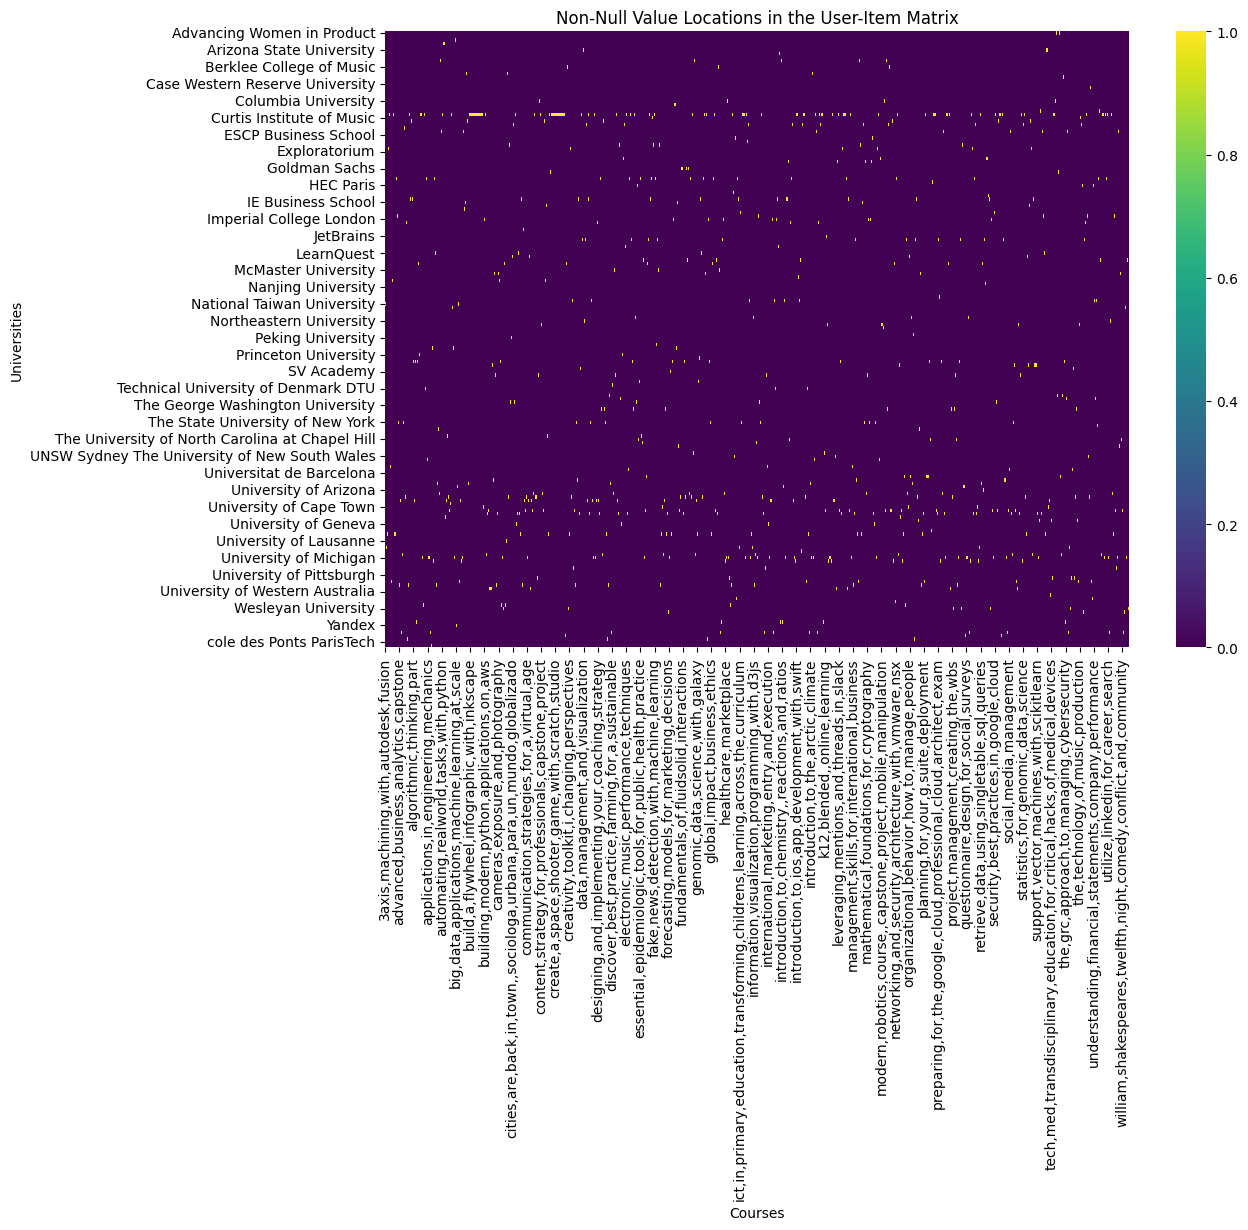

In [103]:
plt.figure(figsize=(12, 8))
sns.heatmap(user_item_matrix.notnull(), cbar=True, cmap="viridis")
plt.title("Non-Null Value Locations in the User-Item Matrix")
plt.xlabel("Courses")
plt.ylabel("Universities")
plt.show()

Alternatively, Calculate Sparsity Ratio

In [104]:
# Calculate sparsity percentage
total_values = user_item_matrix.size
non_null_values = user_item_matrix.notnull().sum().sum()
sparsity = (1 - (non_null_values / total_values)) * 100
print(f"Sparsity of the matrix: {sparsity:.2f}%")

Sparsity of the matrix: 99.45%


In [105]:
user_item_matrix = user_item_matrix.fillna(0)

In [106]:
user_item_matrix = user_item_matrix.sub(user_item_matrix.mean(axis=1), axis=0)
user_item_matrix

Course Name,"3axis,machining,with,autodesk,fusion","3d,art,and,audio,pipeline","3d,cad,application","3d,cad,fundamental","3d,data,visualization,for,science,communication","3d,graphics,in,android,sensors,and,vr","3d,interaction,design,in,virtual,reality","3d,interactions,and,navigation","3d,model,creation,with,autodesk,fusion","3d,models,for,virtual,reality",...,"writing,and,editing,structure,and,organization","writing,and,editing,word,choice,and,word,order","writing,for,young,readers,opening,the,treasure,chest","writing,in,english,at,university","writing,in,first,person,point,of,view","writing,professional,email,and,memos,projectcentered,course","writing,skills,for,engineering,leaders","writing,stories,about,ourselves","writing,winning,resumes,and,cover,letters","writing,your,world,finding,yourself,in,the,academic,space"
University,,,,,,,,,,,,,,,,,,,,,
Advancing Women in Product,-0.000892,-0.000892,-0.000892,-0.000892,-0.000892,-0.000892,-0.000892,-0.000892,-0.000892,-0.000892,...,-0.000892,-0.000892,-0.000892,-0.000892,-0.000892,-0.000892,-0.000892,-0.000892,-0.000892,-0.000892
Alberta Machine Intelligence Institute,-0.001081,-0.001081,-0.001081,-0.001081,-0.001081,-0.001081,-0.001081,-0.001081,-0.001081,-0.001081,...,-0.001081,-0.001081,-0.001081,-0.001081,-0.001081,-0.001081,-0.001081,-0.001081,-0.001081,-0.001081
Alibaba Cloud Academy,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855,...,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855,-0.000855
Amazon Web Services,-0.002586,-0.002586,-0.002586,-0.002586,-0.002586,-0.002586,-0.002586,-0.002586,-0.002586,-0.002586,...,-0.002586,-0.002586,-0.002586,-0.002586,-0.002586,-0.002586,-0.002586,-0.002586,-0.002586,-0.002586
American Museum of Natural History,-0.001679,-0.001679,-0.001679,-0.001679,-0.001679,-0.001679,-0.001679,-0.001679,-0.001679,-0.001679,...,-0.001679,-0.001679,-0.001679,-0.001679,-0.001679,-0.001679,-0.001679,-0.001679,-0.001679,-0.001679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yonsei University,-0.007812,-0.007812,-0.007812,-0.007812,-0.007812,-0.007812,-0.007812,-0.007812,-0.007812,-0.007812,...,-0.007812,-0.007812,-0.007812,-0.007812,-0.007812,-0.007812,-0.007812,-0.007812,-0.007812,-0.007812
cole Polytechnique,-0.003025,-0.003025,-0.003025,-0.003025,-0.003025,-0.003025,-0.003025,-0.003025,-0.003025,-0.003025,...,-0.003025,-0.003025,-0.003025,-0.003025,-0.003025,-0.003025,-0.003025,-0.003025,-0.003025,-0.003025
cole Polytechnique Fdrale de Lausanne,-0.005959,-0.005959,-0.005959,-0.005959,-0.005959,-0.005959,-0.005959,-0.005959,-0.005959,-0.005959,...,-0.005959,-0.005959,-0.005959,-0.005959,-0.005959,-0.005959,-0.005959,-0.005959,-0.005959,-0.005959


#### Compute Cosine Similarity Matrix

In [110]:
item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)
item_similarity_df

Course Name,"3axis,machining,with,autodesk,fusion","3d,art,and,audio,pipeline","3d,cad,application","3d,cad,fundamental","3d,data,visualization,for,science,communication","3d,graphics,in,android,sensors,and,vr","3d,interaction,design,in,virtual,reality","3d,interactions,and,navigation","3d,model,creation,with,autodesk,fusion","3d,models,for,virtual,reality",...,"writing,and,editing,structure,and,organization","writing,and,editing,word,choice,and,word,order","writing,for,young,readers,opening,the,treasure,chest","writing,in,english,at,university","writing,in,first,person,point,of,view","writing,professional,email,and,memos,projectcentered,course","writing,skills,for,engineering,leaders","writing,stories,about,ourselves","writing,winning,resumes,and,cover,letters","writing,your,world,finding,yourself,in,the,academic,space"
Course Name,,,,,,,,,,,,,,,,,,,,,
"3axis,machining,with,autodesk,fusion",1.000000,0.024097,0.021891,0.023750,-0.009364,0.015806,0.013731,0.022595,0.999958,0.013021,...,-0.003069,-0.003069,0.022199,0.020935,0.019111,0.021767,0.013738,0.027137,0.016796,0.018949
"3d,art,and,audio,pipeline",0.024097,1.000000,0.030009,0.032540,-0.005630,0.023272,0.020988,0.999936,0.025765,0.020023,...,0.001254,0.001254,0.030730,0.029129,0.027127,0.030814,0.020730,0.038040,0.024299,0.026810
"3d,cad,application",0.021891,0.030009,1.000000,0.999902,-0.003031,0.021312,0.019421,0.028181,0.023383,0.018558,...,0.002652,0.002652,0.027633,0.026234,0.024579,0.027897,0.019115,0.034338,0.022140,0.024269
"3d,cad,fundamental",0.023750,0.032540,0.999902,1.000000,-0.003163,0.023132,0.021092,0.030558,0.025367,0.020157,...,0.002968,0.002968,0.029963,0.028448,0.026663,0.030261,0.020755,0.037241,0.024024,0.026325
"3d,data,visualization,for,science,communication",-0.009364,-0.005630,-0.003031,-0.003163,1.000000,-0.013139,-0.016678,-0.005529,-0.009443,-0.016636,...,-0.036850,-0.036850,-0.005111,-0.005829,-0.008989,-0.009667,-0.014854,-0.009488,-0.011019,-0.008320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"writing,professional,email,and,memos,projectcentered,course",0.021767,0.030814,0.027897,0.030261,-0.009667,0.020647,0.018180,0.028905,0.023326,0.017277,...,-0.002193,-0.002193,0.028384,0.026815,0.024646,1.000000,0.018104,0.034847,0.021805,0.024410
"writing,skills,for,engineering,leaders",0.013738,0.020730,0.019115,0.020755,-0.014854,0.012315,0.009984,0.019403,0.014821,0.009356,...,-0.007739,-0.007739,0.019107,0.017883,0.015826,0.018104,1.000000,0.022918,0.013486,0.015772
"writing,stories,about,ourselves",0.027137,0.038040,0.034338,0.037241,-0.009488,0.025951,0.023101,0.035695,0.029052,0.021993,...,-0.000873,-0.000873,0.035036,0.033149,0.998174,0.034847,0.022918,1.000000,0.027265,0.030325


#### Generate Recommendations

In [111]:
predicted_ratings = user_item_matrix.dot(item_similarity_df) / item_similarity_df.sum(axis=1)
predicted_ratings

Course Name,"3axis,machining,with,autodesk,fusion","3d,art,and,audio,pipeline","3d,cad,application","3d,cad,fundamental","3d,data,visualization,for,science,communication","3d,graphics,in,android,sensors,and,vr","3d,interaction,design,in,virtual,reality","3d,interactions,and,navigation","3d,model,creation,with,autodesk,fusion","3d,models,for,virtual,reality",...,"writing,and,editing,structure,and,organization","writing,and,editing,word,choice,and,word,order","writing,for,young,readers,opening,the,treasure,chest","writing,in,english,at,university","writing,in,first,person,point,of,view","writing,professional,email,and,memos,projectcentered,course","writing,skills,for,engineering,leaders","writing,stories,about,ourselves","writing,winning,resumes,and,cover,letters","writing,your,world,finding,yourself,in,the,academic,space"
University,,,,,,,,,,,,,,,,,,,,,
Advancing Women in Product,-0.006418,-0.009068,-0.009082,-0.009131,-0.000275,-0.006174,-0.005571,-0.009027,-0.006556,-0.005470,...,-0.001427,-0.001427,-0.008528,-0.008047,-0.007505,-0.007376,-0.005531,-0.008031,-0.007092,-0.007028
Alberta Machine Intelligence Institute,-0.008398,-0.011914,-0.011934,-0.011999,-0.000228,-0.008072,-0.007271,-0.011859,-0.008581,-0.007136,...,-0.001768,-0.001768,-0.011199,-0.010560,-0.009839,-0.009669,-0.007219,-0.010537,-0.009289,-0.009208
Alibaba Cloud Academy,-0.006392,-0.009043,-0.009056,-0.009105,-0.000258,-0.006149,-0.005547,-0.009002,-0.006530,-0.005446,...,-0.001404,-0.001404,-0.008503,-0.008021,-0.007480,-0.007351,-0.005506,-0.008006,-0.007068,-0.007002
Amazon Web Services,-0.019812,-0.028317,-0.028436,-0.028595,0.000705,-0.018928,-0.016924,-0.028178,-0.020259,-0.016593,...,-0.003428,-0.003428,-0.026620,-0.025073,-0.023252,-0.022865,-0.016848,-0.024974,-0.021859,-0.021780
American Museum of Natural History,-0.012372,-0.017575,-0.017625,-0.017721,-0.000068,-0.011862,-0.010658,-0.017492,-0.012644,-0.010458,...,-0.002463,-0.002463,-0.016526,-0.015581,-0.014491,-0.014247,-0.010595,-0.015534,-0.013660,-0.013573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yonsei University,-0.046270,-0.067950,-0.069065,-0.069487,0.014677,-0.042932,-0.037068,-0.067531,-0.047453,-0.036153,...,-0.000541,-0.000541,-0.064013,-0.060032,-0.054511,-0.053808,-0.037437,-0.059275,-0.050246,-0.051377
cole Polytechnique,-0.023361,-0.033474,-0.033638,-0.033827,0.001267,-0.022281,-0.019878,-0.033308,-0.023893,-0.019482,...,-0.003773,-0.003773,-0.031468,-0.029626,-0.027437,-0.026985,-0.019802,-0.029495,-0.025762,-0.025703
cole Polytechnique Fdrale de Lausanne,-0.038140,-0.055371,-0.056017,-0.056348,0.007739,-0.035808,-0.031372,-0.055058,-0.039067,-0.030665,...,-0.002969,-0.002969,-0.052128,-0.048974,-0.044846,-0.044204,-0.031498,-0.048522,-0.041668,-0.042172


In [112]:
predicted_ratings_df = pd.DataFrame(predicted_ratings, index=user_item_matrix.index, columns=user_item_matrix.columns)
predicted_ratings_df

Course Name,"3axis,machining,with,autodesk,fusion","3d,art,and,audio,pipeline","3d,cad,application","3d,cad,fundamental","3d,data,visualization,for,science,communication","3d,graphics,in,android,sensors,and,vr","3d,interaction,design,in,virtual,reality","3d,interactions,and,navigation","3d,model,creation,with,autodesk,fusion","3d,models,for,virtual,reality",...,"writing,and,editing,structure,and,organization","writing,and,editing,word,choice,and,word,order","writing,for,young,readers,opening,the,treasure,chest","writing,in,english,at,university","writing,in,first,person,point,of,view","writing,professional,email,and,memos,projectcentered,course","writing,skills,for,engineering,leaders","writing,stories,about,ourselves","writing,winning,resumes,and,cover,letters","writing,your,world,finding,yourself,in,the,academic,space"
University,,,,,,,,,,,,,,,,,,,,,
Advancing Women in Product,-0.006418,-0.009068,-0.009082,-0.009131,-0.000275,-0.006174,-0.005571,-0.009027,-0.006556,-0.005470,...,-0.001427,-0.001427,-0.008528,-0.008047,-0.007505,-0.007376,-0.005531,-0.008031,-0.007092,-0.007028
Alberta Machine Intelligence Institute,-0.008398,-0.011914,-0.011934,-0.011999,-0.000228,-0.008072,-0.007271,-0.011859,-0.008581,-0.007136,...,-0.001768,-0.001768,-0.011199,-0.010560,-0.009839,-0.009669,-0.007219,-0.010537,-0.009289,-0.009208
Alibaba Cloud Academy,-0.006392,-0.009043,-0.009056,-0.009105,-0.000258,-0.006149,-0.005547,-0.009002,-0.006530,-0.005446,...,-0.001404,-0.001404,-0.008503,-0.008021,-0.007480,-0.007351,-0.005506,-0.008006,-0.007068,-0.007002
Amazon Web Services,-0.019812,-0.028317,-0.028436,-0.028595,0.000705,-0.018928,-0.016924,-0.028178,-0.020259,-0.016593,...,-0.003428,-0.003428,-0.026620,-0.025073,-0.023252,-0.022865,-0.016848,-0.024974,-0.021859,-0.021780
American Museum of Natural History,-0.012372,-0.017575,-0.017625,-0.017721,-0.000068,-0.011862,-0.010658,-0.017492,-0.012644,-0.010458,...,-0.002463,-0.002463,-0.016526,-0.015581,-0.014491,-0.014247,-0.010595,-0.015534,-0.013660,-0.013573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yonsei University,-0.046270,-0.067950,-0.069065,-0.069487,0.014677,-0.042932,-0.037068,-0.067531,-0.047453,-0.036153,...,-0.000541,-0.000541,-0.064013,-0.060032,-0.054511,-0.053808,-0.037437,-0.059275,-0.050246,-0.051377
cole Polytechnique,-0.023361,-0.033474,-0.033638,-0.033827,0.001267,-0.022281,-0.019878,-0.033308,-0.023893,-0.019482,...,-0.003773,-0.003773,-0.031468,-0.029626,-0.027437,-0.026985,-0.019802,-0.029495,-0.025762,-0.025703
cole Polytechnique Fdrale de Lausanne,-0.038140,-0.055371,-0.056017,-0.056348,0.007739,-0.035808,-0.031372,-0.055058,-0.039067,-0.030665,...,-0.002969,-0.002969,-0.052128,-0.048974,-0.044846,-0.044204,-0.031498,-0.048522,-0.041668,-0.042172


### Recommend Courses

In [115]:
user_index = user_item_matrix.index[1]
top_n = 5

recommended_courses = predicted_ratings_df.loc[user_index].sort_values(ascending=False).head(top_n)
print(f'Top {top_n} recommended courses for {user_index} are: \n {recommended_courses}')

Top 5 recommended courses for Alberta Machine Intelligence Institute are: 
 Course Name
corporate,strategy                                                       0.004376
constructivism,and,mathematics,science,and,technology,education          0.001719
accounting,analysis,i,the,role,of,accounting,as,an,information,system    0.001719
lactation,biology                                                        0.001719
global,strategy,ii,doing,business,in,the,global,economy                  0.001719
Name: Alberta Machine Intelligence Institute, dtype: float64
